## Assignment 7: Neural Networks using Keras and Tensorflow Please see the associated document for questions

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

**Resubmission changes**
* 2. a) Added a few comments on the activation function
* 2. b) Added explanation on choice of layering functions
* 2. d) **Didn't get any points for this question last time :)**
* 3. a) Answered this question w. 2 simple conv. layers
* 3. b) Answered this question.

In [53]:
# # Install keras
# pip install keras

In [54]:
# # Install tensorflow
# pip install tensorflow

In [55]:
# # Install pydot
# pip install pydot

In [56]:
# # This didn't work so I had to add tensflow. before every keras.......... Fixed below ;) 

# # Import packages
# from __future__ import print_function
# import keras
# from keras.datasets import mnist
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten
# from keras.layers import Conv2D, MaxPooling2D
# from keras import backend as K
# import tensorflow as tf
# from matplotlib import pyplot as plt
# import numpy as np

In [57]:
# Importing packages
from __future__ import print_function
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
import tensorflow as tf
from tensorflow.keras import regularizers
from matplotlib import pyplot as plt
import numpy as np
import time

Type of data: <class 'tuple'>


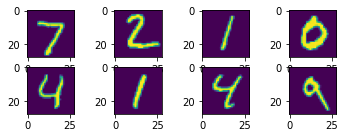

Corresponding labels to row 1: [7 2 1 0]
Corresponding labels to row 2: [4 1 4 9]


In [58]:
# Quick dataexploration:

data = mnist.load_data()
print("Type of data:", type(data))
# The dataset mnist is a commonly used dataset containing 60000 different greyscaled pictures of the size 28x28 of
# the digits {0,1,...,9} stored as a tuple. The dataset also contains 10000 testsets.

(X_TRAIN, LBL_TRAIN), (X_TEST, LBL_TEST) = mnist.load_data()

for i in range(8):  
    plt.subplot(440 + 1 + i)
    plt.imshow(X_TEST[i])
plt.gcf()
plt.show()

print("Corresponding labels to row 1:", LBL_TEST[0:4])
print("Corresponding labels to row 2:", LBL_TEST[4:8])

In [59]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

**Preprocessing**


In [60]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.to_categorical(lbl_test, num_classes)


**Question 1**

**Answer:** Well the **Prepocessing** can be divided into 3 steps (1)-(3):

- Step (1): The sets x_train x_test has the format dtype=uint8 i.e integers that range between 0 and 255. So in the first step
            we change from this format to float32.
            
- Step (2): Instead of having contiously digits than range from 0.0 to 255.0 we normalize the data to range from 0.0 to 1.0

- Step (3): In this step we convert array of length (60000) that contains the labels corresponding to x_train and x_test to a matrix of size (60000,10). The function also change from using digits (0-9) to binary by using the second column in the matrix. The example below illustrates how this works:

lbl_train_ex = (0, 3, 1, 9) becomes:

$$ y\_train\_ex = \begin{bmatrix} 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\ 
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\ 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \end{bmatrix}$$


In [61]:
## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/10
469/469 [==============================] - 1s 1ms/step - loss: 0.4591 - accuracy: 0.8692 - val_loss: 0.2510 - val_accuracy: 0.9271
Epoch 2/10
469/469 [==============================] - 1s 1ms/step - loss: 0.2242 - accuracy: 0.9348 - val_loss: 0.1785 - val_accuracy: 0.9464
Epoch 3/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1713 - accuracy: 0.9492 - val_loss: 0.1497 - val_accuracy: 0.9563
Epoch 4/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1401 - accuracy: 0.9590 - val_loss: 0.1322 - val_accuracy: 0.9589
Epoch 5/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1202 - accuracy: 0.9649 - val_loss: 0.1193 - val_accuracy: 0.9645
Epoch 6/10
469/469 [==============================] - 1s 1ms/step - loss: 0.1053 - accuracy: 0.9687 - val_loss: 0.1066 - val_accuracy: 0.9673
Epoch 7/10
469/469 [==============================] - 1s 1ms/step - loss: 0.0938 - accuracy: 0.9718 - val_loss: 0.1072 - val_accuracy: 0.9681
Epoch 

### Question 2):
**A1)** How many layers does the network in the notebook have? 

**Answer:** From the command model.summary() we can see that the network in question consists of **4 different layers**.

**A2)** How many neurons does each layer have? 

**Answer:** The number of neurons in the model can be found from the column "Output Shape" of the command model.summary().
- **Layer 1: 784**
- **Layer 2: 64**
- **Layer 3: 64**
- **Layer 4: 10**

Hence we get that the total number of Neurons is: $784+64+64+10=922$.

**A3)** What activation functions and why are these appropriate for this application? 

**Answer:** The first layer is just for flatting out the vector.
The first and second hidden layer is a **ReLU** layer which activates all neurons simultaneously for the neural network. It is a effective layer and probably the most commonly used layer in neural networks.
The output layer is a **softmax function** which is just a generalization of the logistic funtion.

So why are these functions appropriate fore this task? Well, first of all the ReLU function is similar to the commonly used sigmoid function. The advdantage of using ReLU over sigmoid is the handling of vanishing of fewer gradients and therefore more suited in this case. Since we want to predict the probability of each digit so the softmax function seems like a obvious choice as the softmax function calculates the probability of each class.

**A4)** What is the total number of parameters for the network? 

**Answer:** Total number of parameters of the network can also be found below and we get that the total number of
parameters is: **0+50240+4160+650=55050**

**A5)** Why does the input and output layers have the dimensions they have?

**Answer:** 
- **Input layer:** Each picture is a image of the size 28x28, after using the flatten layer we get a vector of the shape 1x784 since $28 \cdot 28 = 784 $. Hence the input layer is a vector of shape 1x784.

- **Output layer:** The last layer of the network is the softmax function which is a generalization of the commonly used logistic function and thus the output is a probability vector. Since we have 10 different digits, the probability vector must have the corresponding length i.e 1x10.












**B1)** What loss-function is used to train the network?

**Answer:** **Categorical cross entropy loss function.**

**B2)** What is the functional form (mathematical expression) of the loss function? and how should we interpret it?

**Answer:** **The loss function has the form [1]:** 
$$Loss = - \sum_{i=0}^{output size} \left [ y_i \cdot \log ( \hat{y}_i )  \right ]$$
Where $ \hat{y}_i$ is th $i$-th scalar value in the model output and $y_i$ is the corresponding target. In our case the outputsize would be 9.

The interpretation behind this loss function is:

Remember that the dataset MNIST consists of the digits {0,1,...,9} this means that we want to classify 10 different classes. The Categorical cross entropy loss function measures the dissimilarity or in other words how different each discrete probability is from each other. The minus sign in the equation is just used to make sure that: Closer distributions implies smaller loss.

**B3)** Why is it appropriate for the problem at hand?

**Answer:** The Categorical cross entropy loss function **[2]** can be used when we have two or more class labels in our case we have 10 different class labels since we have the digits {0,1,2,...,9}. Often before we use the Categorical cross entropy loss function we use a softmax function to ensure that the data has the right form. In this case we can see that the last layer was a indeed a softmax function which makes the loss function appropriate. 

In [19]:
# Used commands to answer question 2. A) and B)
print("Shape of the input of the model:", model.input_shape)
print("Shape of the output of the model:", model.output_shape)
print("Total number of parameters in the model:", model.count_params())

print(model.summary())


Shape of the input of the model: (None, 28, 28, 1)
Shape of the output of the model: (None, 10)
Total number of parameters in the model: 55050
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________
None


**C)** 
Train the network for 10 epochs and plot the training and validation accuracy for each epoch.

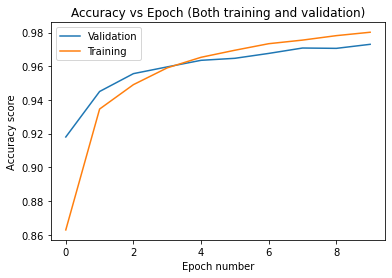

In [20]:
epochs_leng = range(0, 10)

plt.plot(epochs_leng, fit_info.history['val_accuracy'])
plt.plot(epochs_leng, fit_info.history['accuracy'])

plt.ylabel("Accuracy score")
plt.xlabel("Epoch number")

plt.legend(['Validation', 'Training'])

plt.title("Accuracy vs Epoch (Both training and validation)")
plt.show()



**D)** 
Update model to implement a three-layer neural network where the hidden-layers has $500$ 
and $300$ hidden units respectively. Train for $40$ epochs. What is the best validation accuracy you 
can achieve? 
- Geoff Hinton (a co-pioneer of Deep learning) claimed this network could reach a validation accuracy of 0.9847 (http://yann.lecun.com/exdb/mnist/) using weight decay (L2 regularization of weights (kernels): https://keras.io/api/layers/regularizers/). 

Implement weight decay on hidden units and train and select $5$ regularization factors from $0.000001$ to $0.001$. Train 
$3$ replicates networks for each regularization factor. 

Plot the final validation accuracy with standard deviation (computed from the replicates) as a function of the regularization factor. 

How close do you get to Hintons result? – If you do not get the same results, what factors may 
influence this? 

(hint: What information is not given by Hinton on the MNIST database that may 
influence Model training)


In [39]:
num_lay_1 = 500
num_lay_2 = 300
num_epochs = 40
reg_factors = np.linspace(0.000001, 0.001, num = 5)
repl = range(0,3)


In [40]:
shape = (len(reg_factors), len(repl))
res = np.zeros(shape)

In [41]:
res

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [42]:
start = time.time()

for i in range(0,5):
    print("Reg_Factors:", i+1)
    
    for j in repl:
        print("Replication:",j+1)
    
        
        model = Sequential()

        model.add(Flatten())
        model.add(Dense(num_lay_1, activation = 'relu', activity_regularizer = regularizers.l2(reg_factors[i])))
        model.add(Dense(num_lay_2, activation = 'relu', activity_regularizer = regularizers.l2(reg_factors[i])))
        model.add(Dense(num_classes, activation='softmax'))


        model.compile(loss=keras.losses.categorical_crossentropy,
                       optimizer=keras.optimizers.SGD(learning_rate = 0.1),
                metrics=['accuracy'],)

        fit_info = model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=num_epochs,
                   verbose=0,
                   validation_data=(x_test, y_test))
        score = model.evaluate(x_test, y_test, verbose=0)
        
        
        res[i,j] = score[1]
        
        
print("Elapsed time:", (time.time() - start),"sec")

Reg_Factors: 1
Replication: 1
Replication: 2
Replication: 3
Reg_Factors: 2
Replication: 1
Replication: 2
Replication: 3
Reg_Factors: 3
Replication: 1
Replication: 2
Replication: 3
Reg_Factors: 4
Replication: 1
Replication: 2
Replication: 3
Reg_Factors: 5
Replication: 1
Replication: 2
Replication: 3
Elapsed time: 1520.796766757965 sec


In [43]:
# Calculate mean and std... stored in an array
mean_res = [np.mean(res[0]), np.mean(res[1]), np.mean(res[2]), np.mean(res[3]), np.mean(res[4])]
std_res= [np.std(res[0]), np.std(res[1]), np.std(res[2]), np.std(res[3]), np.std(res[4])]


In [44]:
mean_minus_std = []
mean_plus_std = []

for i in range(0,5):
    mean_minus_std.append(mean_res[i] - std_res[i])
    mean_plus_std.append(mean_res[i] + std_res[i])
    
   

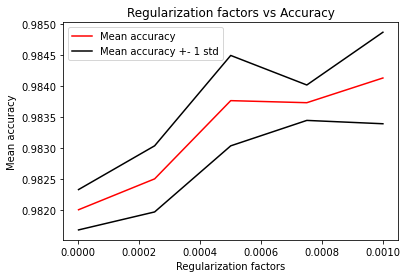

In [45]:

plt.plot()
plt.plot(reg_factors, mean_res, color = "red")
plt.plot(reg_factors, mean_minus_std,color = "black")
plt.plot(reg_factors, mean_plus_std, color = "black")
plt.title("Regularization factors vs Accuracy")
plt.ylabel("Mean accuracy")
plt.xlabel("Regularization factors")

plt.legend(['Mean accuracy', 'Mean accuracy +- 1 std'])

plt.show()

**Answer to Question 2.d)**
From the plot above we can see that the maximum mean accuracy was found when the regularixation factor was equal to 0.0010 which resulted in a mean accuracy: 0.9841333230336508. Since the results is very close to the results found by Geoff Hinton (accuracy: 0.9847) I assume the function works as it is meant to.

### Question 3):  Convolutional layers.

**A)** Design a model that makes use of at least one convolutional layer – how performant a model can 
you get? -- According to the MNIST database it should be possible reach to 99% accuracy on the 
validation data. If you choose to use any layers apart from convolutional layers and layers that you 
used in previous questions, you must describe what they do. If you do not reach 99% accuracy, 
report your best performance and explain your attempts and thought process.

In [71]:
input_shape

(28, 28, 1)

In [75]:
## Define model ##
model = Sequential()

# added conv. layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# added another conv. layer
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dense(300, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs= 40,
           verbose=1,
           validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Epoch 1/40
469/469 [==============================] - 26s 54ms/step - loss: 0.3367 - accuracy: 0.8982 - val_loss: 0.1052 - val_accuracy: 0.9649
Epoch 2/40
469/469 [==============================] - 27s 57ms/step - loss: 0.0800 - accuracy: 0.9749 - val_loss: 0.0662 - val_accuracy: 0.9774
Epoch 3/40
469/469 [==============================] - 27s 58ms/step - loss: 0.0544 - accuracy: 0.9825 - val_loss: 0.0464 - val_accuracy: 0.9846
Epoch 4/40
469/469 [==============================] - 24s 51ms/step - loss: 0.0427 - accuracy: 0.9863 - val_loss: 0.0412 - val_accuracy: 0.9860
Epoch 5/40
469/469 [==============================] - 28s 60ms/step - loss: 0.0342 - accuracy: 0.9895 - val_loss: 0.0345 - val_accuracy: 0.9884
Epoch 6/40
469/469 [==============================] - 30s 65ms/step - loss: 0.0276 - accuracy: 0.9911 - val_loss: 0.0284 - val_accuracy: 0.9903
Epoch 7/40
469/469 [==============================] - 30s 63ms/step - loss: 0.0233 - accuracy: 0.9926 - val_loss: 0.0525 - val_accuracy:

In [76]:
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

Test loss: 0.036609210073947906, Test accuracy 0.9915000200271606


Adding two simple convolutional layers with output 32 respectively 64 and a Maxpooling function to each conv. layer results in a accuracy: 99.15%. 

**3. B)** Discuss the differences and potential benefits of using convolutional layers over fully connected 
ones for the particular application?

**Answer** : Convolutional layers is often used in image processing as this method usually results in high accuracy for "large" images. The Advantages of convolutional layers over fully connected is the ability to find connection which is usually filtered out using fully connected models.  

### Question 4) Auto-Encoder for denoising


In [16]:
import numpy as np
def salt_and_pepper(input, noise_level=0.5):
    """
    This applies salt and pepper noise to the input tensor - randomly setting bits to 1 or 0.
    Parameters
    ----------
    input : tensor
        The tensor to apply salt and pepper noise to.
    noise_level : float
        The amount of salt and pepper noise to add.
    Returns
    -------
    tensor
        Tensor with salt and pepper noise applied.
    """
    # salt and pepper noise
    a = np.random.binomial(size=input.shape, n=1, p=(1 - noise_level))
    b = np.random.binomial(size=input.shape, n=1, p=0.5)
    c = (a==0) * b
    return input * a + c


#data preparation
flattened_x_train = x_train.reshape(-1,784)
flattened_x_train_seasoned = salt_and_pepper(flattened_x_train, noise_level=0.4)

flattened_x_test = x_test.reshape(-1,784)
flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level=0.4)


In [17]:
latent_dim = 96  

input_image = keras.Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_image)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input_image, decoded)
encoder_only = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape=(latent_dim,))
decoder_layer = Sequential(autoencoder.layers[-2:])
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [18]:
fit_info_AE = autoencoder.fit(flattened_x_train_seasoned, flattened_x_train,
                epochs=32,
                batch_size=64,
                shuffle=True,
                validation_data=(flattened_x_test_seasoneed, flattened_x_test))


Epoch 1/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1933 - val_loss: 0.1548
Epoch 2/32
938/938 [==============================] - 2s 2ms/step - loss: 0.1474 - val_loss: 0.1404
Epoch 3/32
938/938 [==============================] - 2s 3ms/step - loss: 0.1379 - val_loss: 0.1335
Epoch 4/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1327 - val_loss: 0.1307
Epoch 5/32
938/938 [==============================] - 2s 2ms/step - loss: 0.1294 - val_loss: 0.1284
Epoch 6/32
938/938 [==============================] - 2s 2ms/step - loss: 0.1273 - val_loss: 0.1268
Epoch 7/32
938/938 [==============================] - 2s 2ms/step - loss: 0.1256 - val_loss: 0.1257
Epoch 8/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1243 - val_loss: 0.1245
Epoch 9/32
938/938 [==============================] - 3s 3ms/step - loss: 0.1233 - val_loss: 0.1236
Epoch 10/32
938/938 [==============================] - 2s 2ms/step - loss: 0.1223 - val_loss: 0.1236

**A)** The notebook implements a simple denoising deep autoencoder model. Explain what the model 
does: use the data-preparation and model definition code to explain how the goal of the model is 
achieved. Explain the role of the loss function? Draw a diagram of the model and include it in your 
report. Train the model with the settings given.


**Answer**: ?

**B)** Add increasing levels of noise to the test-set using the salt_and_pepper()-function (0 to 1). Use 
matplotlib to visualize a few examples (3-4) in the original, “seasoned” (noisy), and denoised
versions. (Hint: for visualization use imshow(), use the trained autoencoder from 4A to denoise the 
noisy digits). At what noise level does it become difficult to identify the seasoned digits for you? At 
what noise level does the denoising stop working?


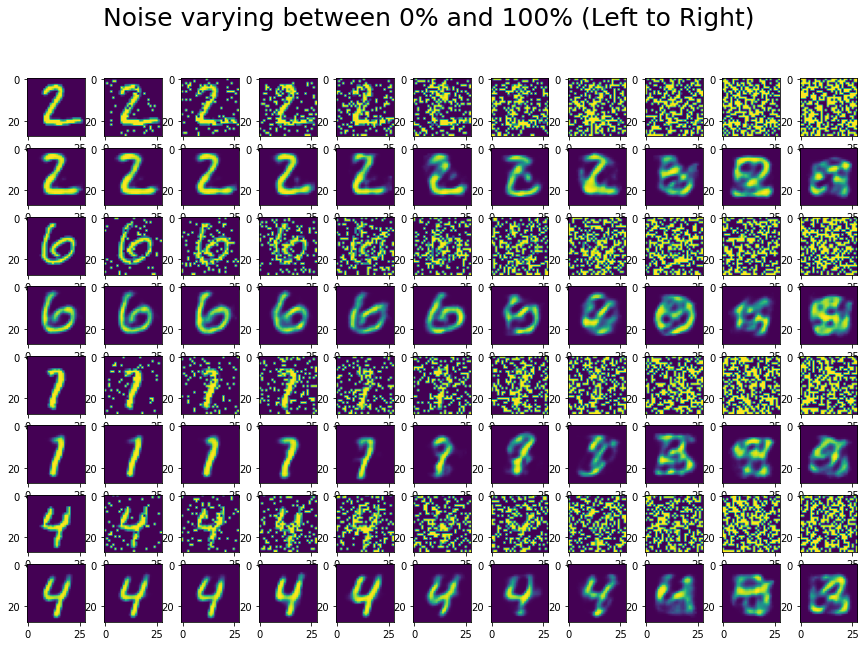

In [19]:
idx = [1, 11, 111, 1111] # index of use image
lvl_noise = np.linspace(0, 1, num = 11)


fig, ax = plt.subplots(nrows = 2*len(idx) , ncols =len(lvl_noise) , figsize = (15,10)) 

for j in range(0,len(idx)):
    for i in range(0, len(lvl_noise)):

        flattened_x_test_seasoneed = salt_and_pepper(flattened_x_test, noise_level = lvl_noise[i])

        original_im = original_im = X_TEST[idx[j]]
        flat_im = flattened_x_test_seasoneed[idx[j]]

        encoded_im = encoder_only.predict(flat_im[None])[0]
        recoded_im = decoder.predict(encoded_im[None])[0]

        ax[2*j+0][i].imshow(np.reshape(flat_im, (28,28)))
        ax[2*j+1][i].imshow(np.reshape(recoded_im, (28,28)))


fig.suptitle('Noise varying between 0% and 100% (Left to Right)', fontsize=25)
plt.show()

From the picture above we can read the noised image up to 50% noise then it becomes impossible to even identify that it is digits written. After using the decoder we can actually read the digits up to 70% noise so that's a great improvement.

**C)** Test whether denoising improves the classification with the best performing model you obtained
in questions 2 or 3. Plot the accuracy as a function of noise-level for the seasoned and denoised 
datasets. Discuss your results. 




Didn't have time.

**D)** Explain how you can use the decoder part of the denoising auto-encoder to generate synthetic
“hand-written” digits? – Describe the procedure, implement it and show examples in your report.

Didn't have time.

## References:

**[1]**  https://peltarion.com/knowledge-center/documentation/modeling-view/build-an-ai-model/loss-functions/categorical-crossentropy

**[2]** https://keras.io/api/losses/probabilistic_losses/#categoricalcrossentropy-class

